In [12]:
import sentiment as sentimentinterface
import classify
import numpy as np
import importlib
from wordcloud import WordCloud,ImageColorGenerator
from imageio import imread, imwrite
import matplotlib.pyplot as plt

In [4]:
importlib.reload(sentimentinterface)
print("Reading data")
tarfname = "data/sentiment.tar.gz"
sentiment = sentimentinterface.read_data(tarfname)

Reading data
-- train data
sentiment/train.tsv
4582
-- dev data
sentiment/dev.tsv
458
-- transforming data and labels


In [5]:
# (diff, max_df, min_df, c) =  (0.4, 0.2, 3, 3.7)
stop_words = sentimentinterface.generate_stop_words(sentiment, diff = 0.4)
sentimentinterface.vectorize_data(sentiment, stop_words = stop_words, max_df = 0.2, min_df = 3)
clf = classify.train_classifier(sentiment.trainX, sentiment.trainy, C = 3.7)

In [6]:
# Vectorizer vocaulary list (ordered)
cv = sentiment.count_vect.vocabulary_
cv = [(v,w) for w,v in cv.items()]
cv.sort()
cv = [x[1] for x in cv]

# list of (coef, word) in order
word_coef = [x for x in zip(clf.coef_[0], cv)]

In [25]:
def generate_word_dict(word_coef):
    pos_d = {}
    neg_d = {}

    for x in word_coef:
        word = x[1]
        coef = x[0]
        if coef > 0:
            pos_d[word] = int(100*coef)
        else:
            neg_d[word] = -int(100*coef)
     
    return pos_d, neg_d

pos_d, neg_d = generate_word_dict(word_coef)

In [31]:
def generate_word_cloud(word_dict, mask, bc):
    wordcloud = WordCloud(scale=4, width=1000, height=1000,
                          mask = mask,
                          background_color=bc)
    wordcloud.generate_from_frequencies(word_dict)
    fig = plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    return fig

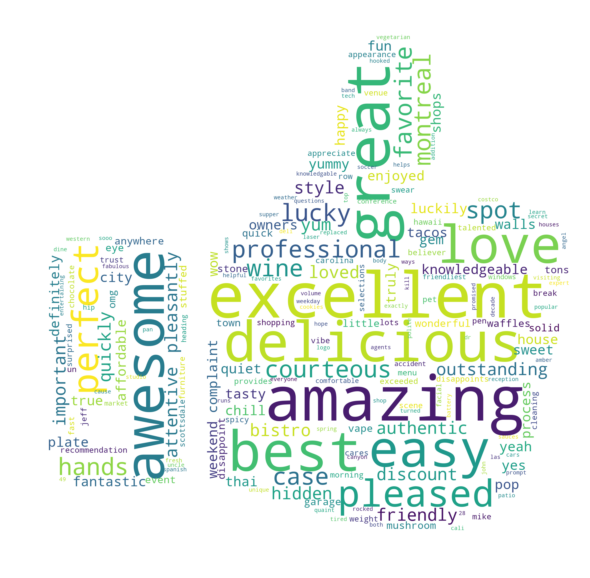

In [32]:
# Positive WordCloud
mask_pos = imread('./Thumb Up.png')
wc_pos = generate_word_cloud(word_dict=pos_d, mask=mask_pos, bc='white')

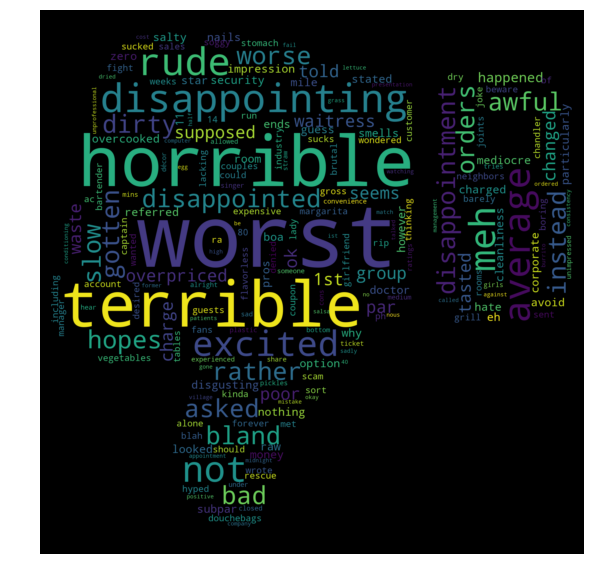

In [37]:
# Negative WordCloud
mask_neg = imread('./Thumb Down.png')
wc_neg = generate_word_cloud(word_dict=neg_d, mask=mask_neg, bc='black')

In [38]:
# Save Images
wc_pos.savefig('Wordcloud_pos.png')
wc_neg.savefig('Wordcloud_neg.png')